In [1]:
from glob import glob
from waveform_tools import ScopeWaveform
import math
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget

In [2]:
infpns = glob('20220321_data_58V/*.csv')

def trigger_intervals_one_file(infpn):
    wf = ScopeWaveform(infpn)
    print(wf.waveform_peaks(9e-3))
    print(wf.df.head())
    wf.draw_waveform()

[(-4.498e-06, 0.009600000381373548), (2.68e-08, 0.01800000068137355), (5.6824e-06, 0.01080000038137355), (7.2068e-06, 0.01440000058137355)]
         info_name         value    units      time  waveform_value  \
0    Record Length  1.000000e+05   Points -0.000008          0.0012   
1  Sample Interval  2.000000e-10        s -0.000008          0.0000   
2    Trigger Point  3.998000e+04  Samples -0.000008          0.0012   
3     Trigger Time  2.839683e-11        s -0.000008          0.0024   
4              NaN           NaN      NaN -0.000008          0.0012   

   partial_integral  is_peak  
0            0.0012    False  
1            0.0012    False  
2            0.0024    False  
3            0.0048    False  
4            0.0060    False  


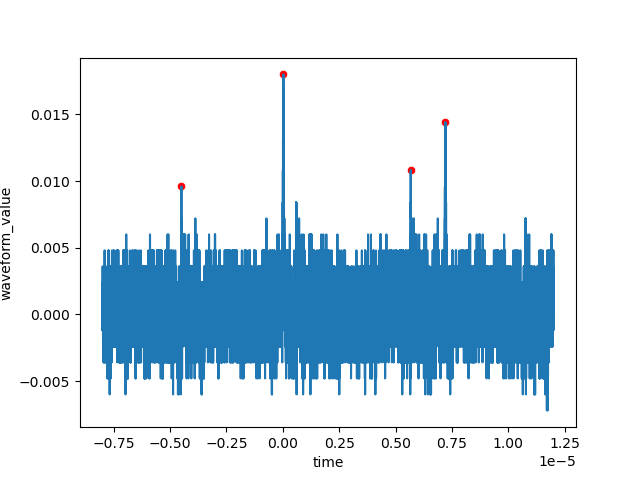

In [3]:
trigger_intervals_one_file(infpns[1])

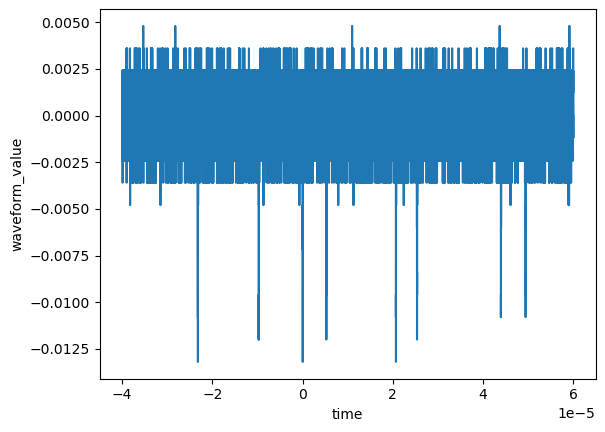

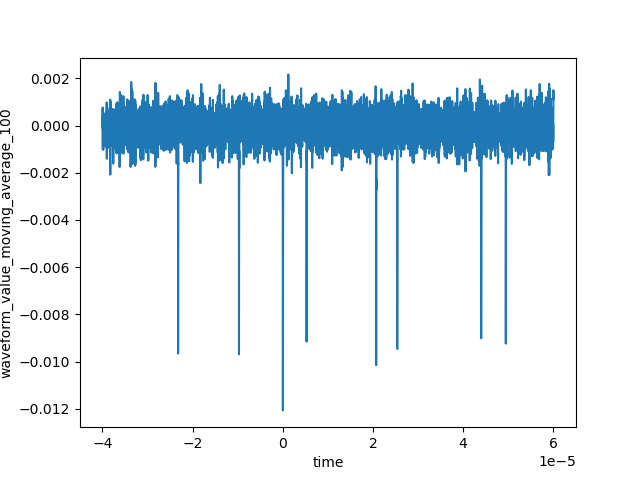

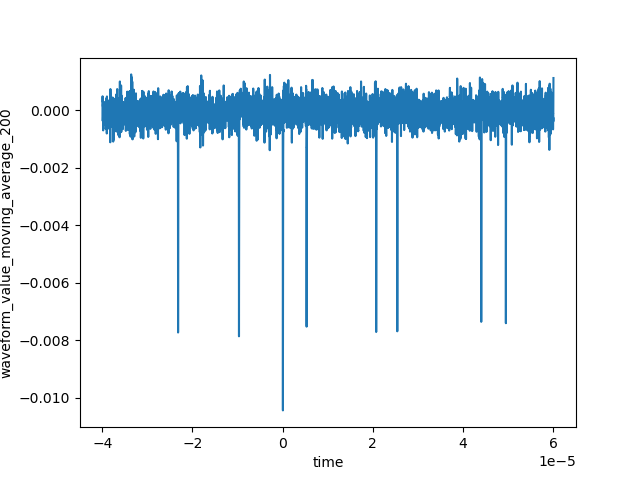

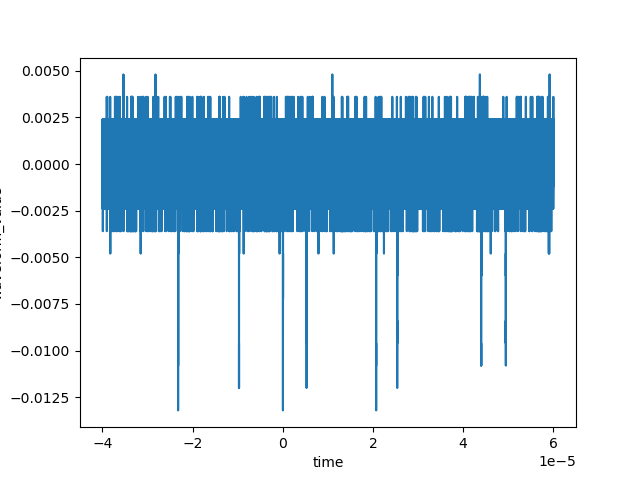

In [4]:
wf = ScopeWaveform('20220408_rate_waveform_57.2V_amp_diff_box_25C/sample1.csv')
wf.add_moving_averate(100)
wf.draw_waveform(100)
wf.add_moving_averate(200)
wf.draw_waveform(200)
wf.draw_waveform()

110080.9370089358


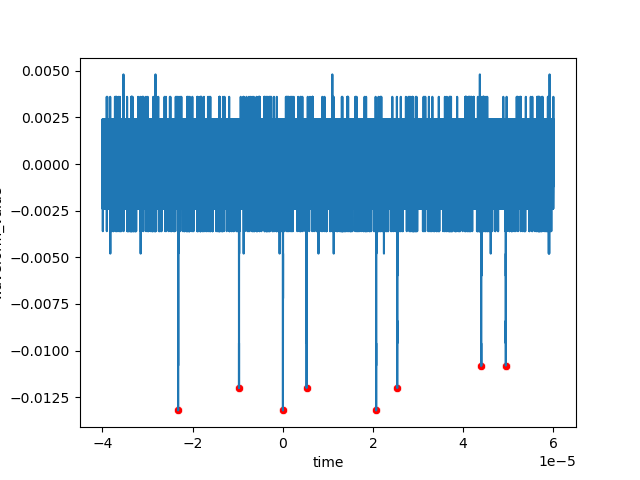

In [5]:
def likeliood_func(b):
    return lambda a: math.pow(a, len(b))*math.exp(-a*sum(b))
wf.waveform_peaks(0.007, polarity=-1)
interarrivals = wf.waveform_peak_time_diffs(0.007, polarity=-1)
wf.draw_waveform()
le = likeliood_func(interarrivals)
r_min = len(interarrivals)/sum(interarrivals)
print(r_min)
# le(r_min)
# t = np.linspace(0, 2*r_min, 100)
# plt.plot(t, le(t), color='red')

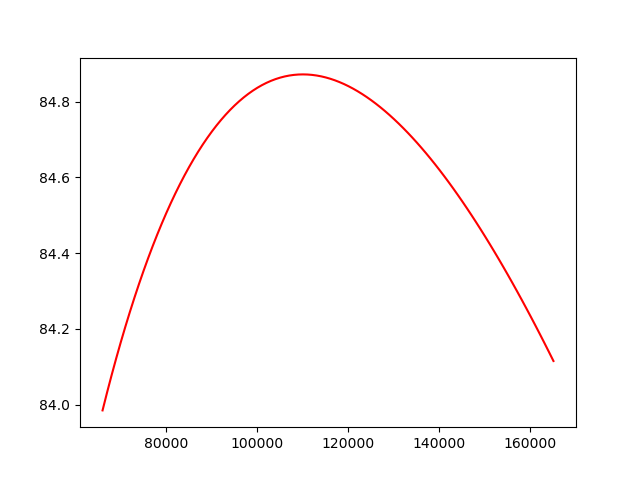

In [6]:
def log_likelihood_func(b):
    return lambda a: len(b)*math.log(a)-a*sum(b)
llf = log_likelihood_func(interarrivals)
llf_vec = np.vectorize(llf)
r_min = len(interarrivals)/sum(interarrivals)
t = np.linspace(.6*r_min, 1.5*r_min, 100)
plt.figure()
plt.plot(t, llf_vec(t), color='red')
plt.show()